In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [12]:
df = pd.read_csv('/kaggle/input/confer-extension-results/CONFER 2.0 Results  - Part 5 KP1-KP2 Plot.csv') 
df

,Model,Types,Accuracy,K2→Special Token\nAttention
0,RoBERTa,Type 4 Related (Original),1.000000,1.763021
1,RoBERTa,Type 4 Somewhat Related,1.000000,1.870840
2,RoBERTa,Type 4 Unrelated,1.000000,1.739159
3,RoBERTa,Type 5A Related,0.062500,1.374549
4,RoBERTa,Type 5A Unrelated (Original),1.000000,1.539584
5,RoBERTa,Type 5P Related,0.997500,1.394871
6,RoBERTa,Type 5P Unrelated (Original),0.997500,1.457873
7,DeBERTa,Type 4 Related (Original),0.989899,2.804119
8,DeBERTa,Type 4 Somewhat Related,1.000000,2.850116
9,DeBERTa,Type 4 Unrelated,1.000000,2.668373


In [31]:
set(df['Types'].values)

{'Type 4 Related (Original)',
 'Type 4 Somewhat Related',
 'Type 4 Unrelated',
 'Type 5A Related ',
 'Type 5A Unrelated (Original)',
 'Type 5P Related ',
 'Type 5P Unrelated (Original)'}

In [13]:
# add underscores to the type names
df['Types'] = df['Types'].replace({
            'Type 4 Related (Original)': 'Type 4-Original',
            'Type 4 Somewhat Related': 'Type 4-Modified (Somewhat Related)',
            'Type 4 Unrelated': 'Type 4-Modified (Unrelated)',
            'Type 5A Related ': 'Type 5_a-Modified',
            'Type 5P Related ': 'Type 5_p-Modified',
           'Type 5A Unrelated (Original)': 'Type 5_a-Original',
           'Type 5P Unrelated (Original)': 'Type 5_p-Original'
            })
df

,Model,Types,Accuracy,K2→Special Token\nAttention
0,RoBERTa,Type 4-Original,1.000000,1.763021
1,RoBERTa,Type 4-Modified (Somewhat Related),1.000000,1.870840
2,RoBERTa,Type 4-Modified (Unrelated),1.000000,1.739159
3,RoBERTa,Type 5_a-Modified,0.062500,1.374549
4,RoBERTa,Type 5_a-Original,1.000000,1.539584
5,RoBERTa,Type 5_p-Modified,0.997500,1.394871
6,RoBERTa,Type 5_p-Original,0.997500,1.457873
7,DeBERTa,Type 4-Original,0.989899,2.804119
8,DeBERTa,Type 4-Modified (Somewhat Related),1.000000,2.850116
9,DeBERTa,Type 4-Modified (Unrelated),1.000000,2.668373


In [6]:
roberta_df = df[df['Model'] == 'RoBERTa']
roberta_df

,Model,Types,Accuracy,K2→Special Token\nAttention
0,RoBERTa,Type 4 Related (Original),1.0000,1.763021
1,RoBERTa,Type 4 Somewhat Related,1.0000,1.870840
2,RoBERTa,Type 4 Unrelated,1.0000,1.739159
3,RoBERTa,Type 5A Related,0.0625,1.374549
4,RoBERTa,Type 5A Unrelated (Original),1.0000,1.539584
5,RoBERTa,Type 5P Related,0.9975,1.394871
6,RoBERTa,Type 5P Unrelated (Original),0.9975,1.457873


In [14]:
titles = ['RoBERTa','DeBERTa','Gemma','Llama']
dfs = [df[df['Model'] == title] for title in titles]

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

red_yellow_green = LinearSegmentedColormap.from_list("RYG", ["red", "yellow", "green"])
norm = plt.Normalize(roberta_df['Accuracy'].min(), roberta_df['Accuracy'].max())
colors = red_yellow_green(norm(roberta_df['Accuracy']))

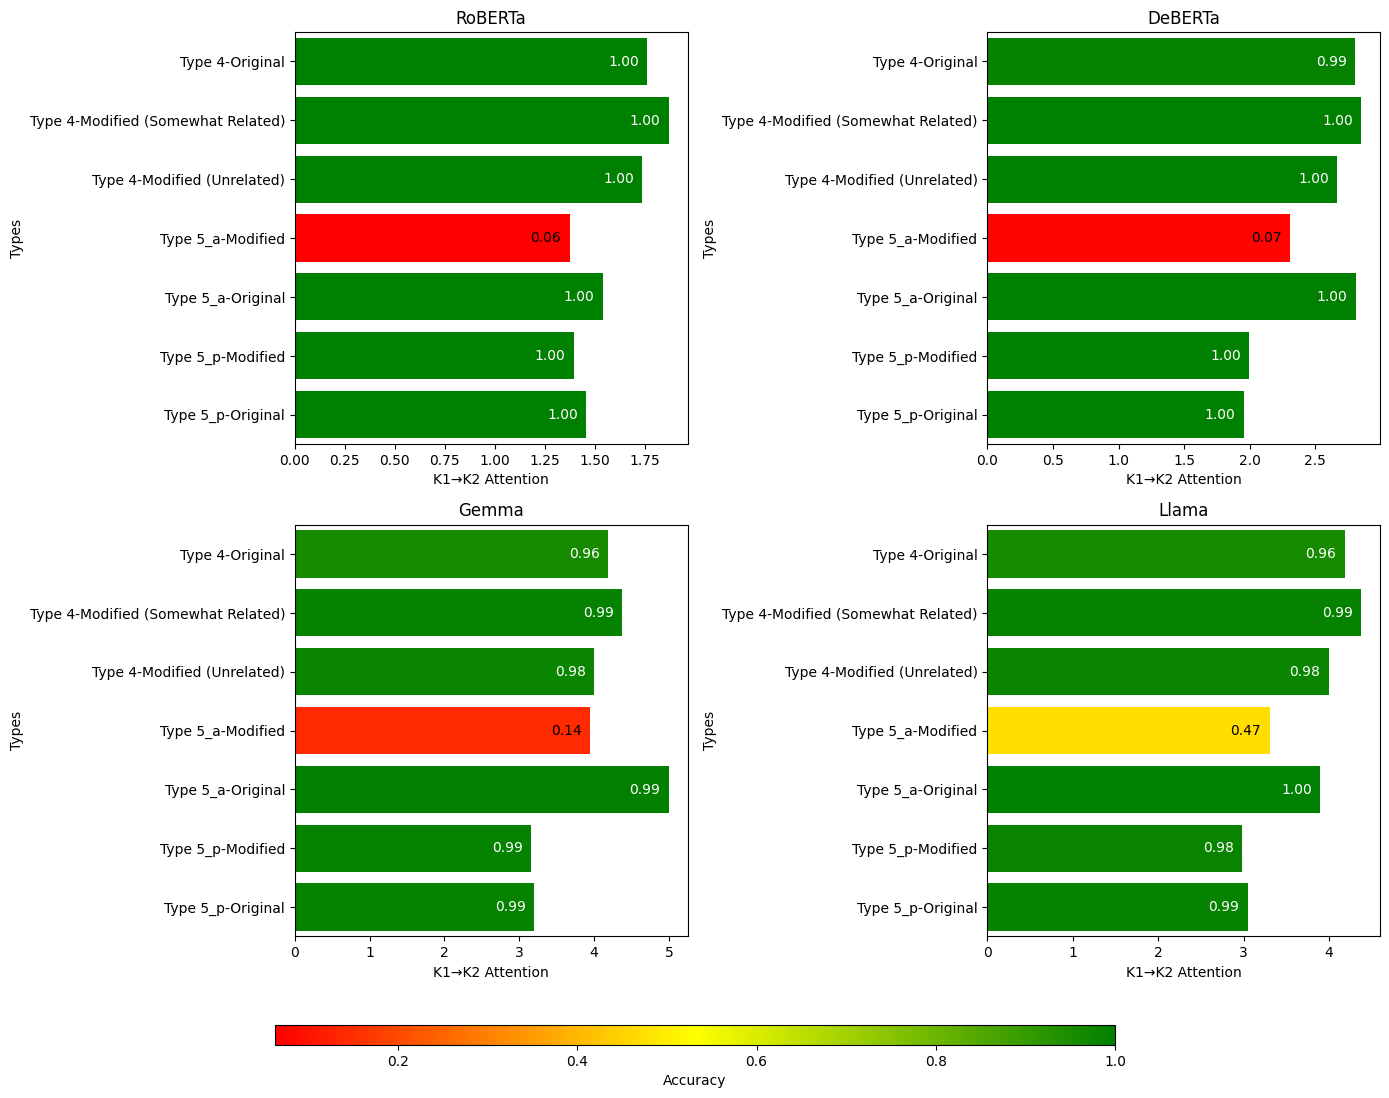

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# Create custom red-yellow-green colormap
red_yellow_green = LinearSegmentedColormap.from_list("RYG", ["red", "yellow", "green"])

# Create subplot grid
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()  # Flatten for easy iteration

# Compute global accuracy normalization
global_min = min(df['Accuracy'].min() for df in dfs)
global_max = max(df['Accuracy'].max() for df in dfs)
norm = plt.Normalize(global_min, global_max)

# Create the plots
for i, (df, ax, title) in enumerate(zip(dfs, axs, titles)):
    # Map accuracy to color
    colors = red_yellow_green(norm(df['Accuracy']))

    # Plot horizontal bar chart
    sns.barplot(
        data=df,
        y='Types',  # Labels go on y-axis for horizontal bars
        x='K2→Special Token\nAttention',
        ax=ax,
        palette='gray'  # Placeholder for recoloring
    )

    # Apply custom facecolors based on accuracy
    for patch, color in zip(ax.patches, colors):
        patch.set_facecolor(color)

    # Add accuracy values beside bars
    for patch, acc in zip(ax.patches, df['Accuracy']):
        width = patch.get_width()
        xlim = ax.get_xlim()
        offset = (xlim[1] - xlim[0]) * 0.1 

        color = 'black' if acc < 0.5 else 'white'
        
        ax.text(
            width - offset,                        # Position just beyond bar end
            patch.get_y() + patch.get_height() / 2,
            f'{acc:.2f}',
            va='center', fontsize=10, color=color
        )

    # Titles and axis styling
    ax.set_title(title)
    ax.set_xlabel('K1→K2 Attention')
    ax.set_ylabel('Types')

# Add shared colorbar to the right
sm = plt.cm.ScalarMappable(cmap=red_yellow_green, norm=norm)
sm.set_array([])

# Reserve space and add the colorbar axis
plt.tight_layout()
# plt.subplots_adjust(bottom=0.4)  # Leave space for colorbar

cbar_ax = fig.add_axes([0.2, -0.05, 0.6, 0.02])  # [left, bottom, width, height]
fig.colorbar(sm, cax=cbar_ax, orientation='horizontal', label='Accuracy')

# Final layout adjustments
plt.savefig('horizontal_part5_K1_2.pdf', bbox_inches='tight', dpi=300)
plt.show()

/tmp/ipykernel_36/1503622540.py:48: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


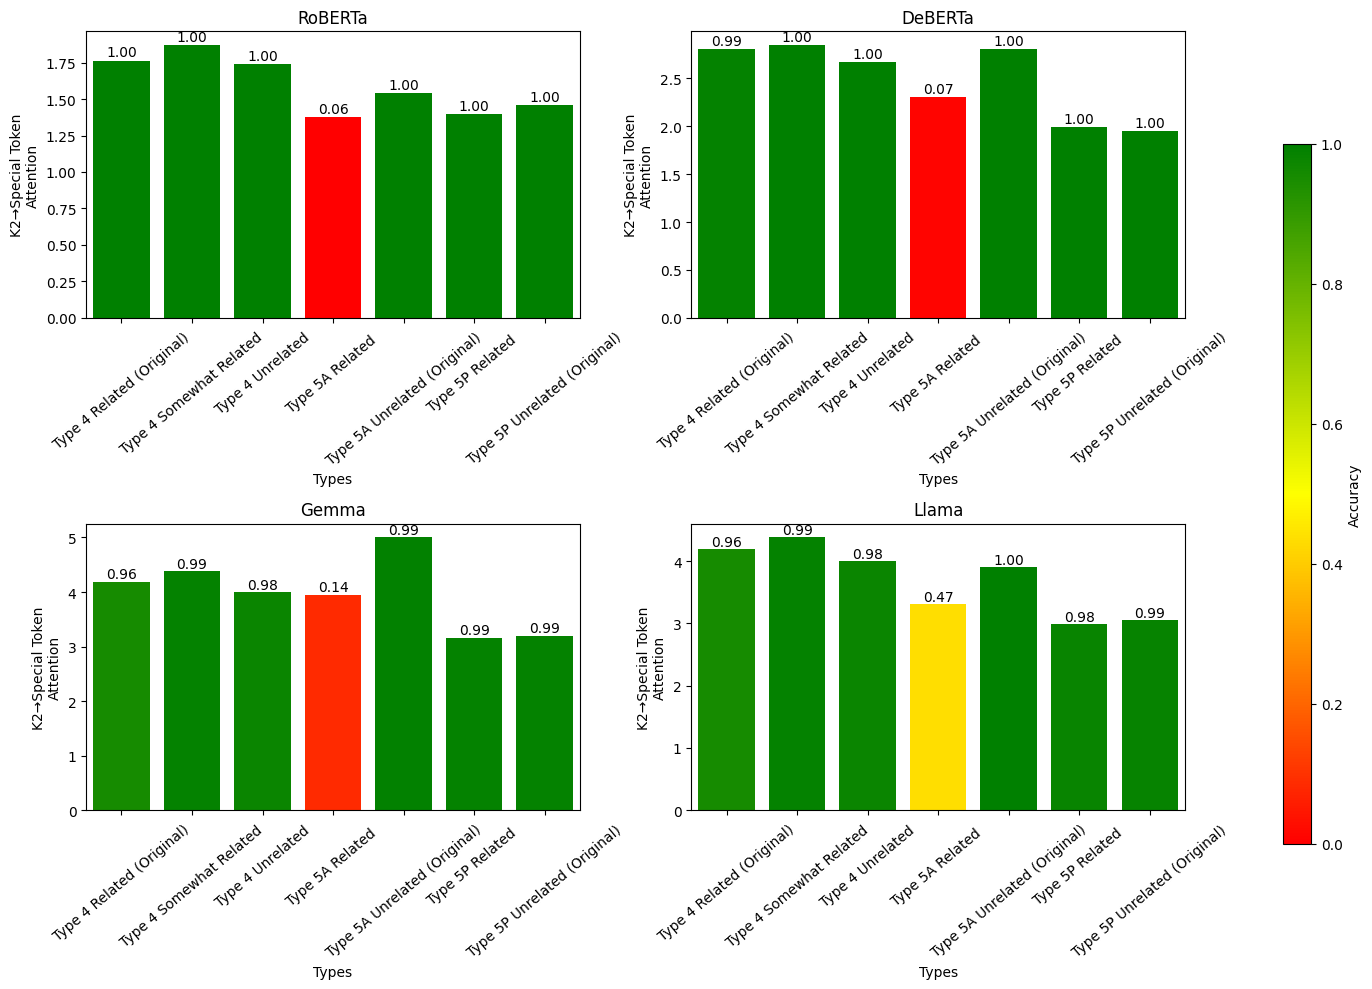

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# Create custom red-yellow-green colormap
red_yellow_green = LinearSegmentedColormap.from_list("RYG", ["red", "yellow", "green"])

# Create subplot grid
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()  # Flatten for easy looping

global_min = min(df['Accuracy'].min() for df in dfs)
global_max = max(df['Accuracy'].max() for df in dfs)
norm = plt.Normalize(global_min, global_max)

for i, (df, ax, title) in enumerate(zip(dfs, axs, titles)):
    # Normalize accuracy for this plot
    colors = red_yellow_green(norm(df['Accuracy']))

    # Plot bar chart
    sns.barplot(data=df, x='Types', y='K2→Special Token\nAttention', ax=ax, palette='gray')

    # Recolor bars
    for patch, color in zip(ax.patches, colors):
        patch.set_facecolor(color)

    # Add labels on top of bars
    for patch, acc in zip(ax.patches, df['Accuracy']):
        height = patch.get_height()
        ax.text(
            patch.get_x() + patch.get_width() / 2,
            height + 0.01,
            f'{acc:.2f}',
            ha='center', va='bottom', fontsize=10, color='black'
        )

    ax.set_title(title)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.tick_params(axis='x', pad=5) 

# Create a side colorbar axis
from mpl_toolkits.axes_grid1 import make_axes_locatable
# Create colorbar axis to the right of the grid
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
# Add colorbar to that axis
fig.colorbar(sm, cax=cbar_ax, label='Accuracy')

plt.tight_layout()
plt.savefig('part5_K2_CLS.png', dpi=300)
plt.subplots_adjust(right=0.85)
plt.show()